In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

import pymc3 as pm
import pandas as pd


In [3]:

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)


ValueError: could not convert string to float: '51.06,'

In [9]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84, 53.16 ])


<AxesSubplot:ylabel='Density'>

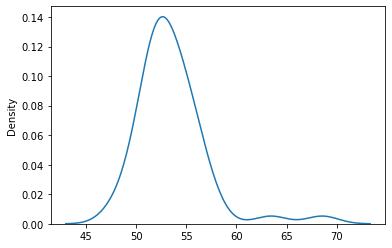

In [10]:
sns.kdeplot(data)

In [12]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace_g = pm.sample(1100)



/tmp/ipykernel_7755/2726727651.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(1100)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 3 seconds.


/tmp/ipykernel_7755/461129695.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(chain_g)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/ma/.bin/anaconda3/envs/bays/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

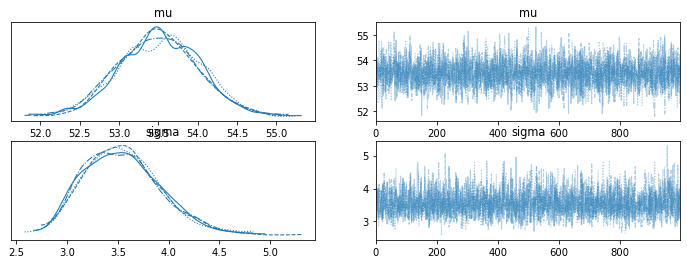

In [13]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)


In [14]:
df = pm.summary(chain_g)


Got error No model on context stack. trying to find log_likelihood in translation.
/home/ma/.bin/anaconda3/envs/bays/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [15]:
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.51,0.51,52.62,54.52,9.00e-03,6.00e-03,3335.0,2709.0,1.0
sigma,3.55,0.38,2.84,4.22,7.00e-03,5.00e-03,3196.0,2180.0,1.0


In [16]:
y_pred = pm.sample_ppc(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')

for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)


AttributeError: module 'pymc3' has no attribute 'sample_ppc'

/home/ma/.bin/anaconda3/envs/bays/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


<AxesSubplot:ylabel='Density'>

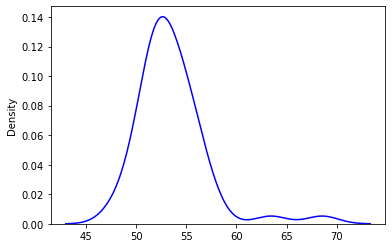

In [18]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')



In [22]:
tips = sns.load_dataset('tips')

In [24]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<AxesSubplot:xlabel='day', ylabel='tip'>

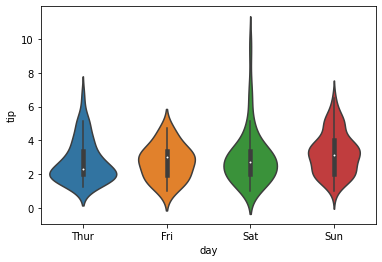

In [25]:
sns.violinplot(x='day', y='tip', data=tips)

In [26]:
y = tips['tip'].values

In [27]:
y

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.5 ,  3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  2.  ,
        2.  ,  4.3 ,  3.  ,  1.45,  2.5 ,  3.  ,  2.45,  3.27,  3.6 ,
        2.  ,  3.07,  2.31,  5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,
        3.  ,  5.  ,  6.  ,  2.05,  3.  ,  2.5 ,  2.6 ,  5.2 ,  1.56,
        4.34,  3.51,  3.  ,  1.5 ,  1.76,  6.73,  3.21,  2.  ,  1.98,
        3.76,  2.64,  3.15,  2.47,  1.  ,  2.01,  2.09,  1.97,  3.  ,
        3.14,  5.  ,  2.2 ,  1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,
        3.4 ,  1.83,  5.  ,  2.03,  5.17,  2.  ,  4.  ,  5.85,  3.  ,
        3.  ,  3.5 ,  1.  ,  4.3 ,  3.25,  4.73,  4.  ,  1.5 ,  3.  ,
        1.5 ,  2.5 ,  3.  ,  2.5 ,  3.48,  4.08,  1.64,  4.06,  4.29,
        3.76,  4.  ,  3.  ,  1.  ,  4.  ,  2.55,  4.  ,  3.5 ,  5.07,
        1.5 ,  1.8 ,  2.92,  2.31,  1.68,  2.5 ,  2.  ,  2.52,  4.2 ,
        1.48,  2.  ,

In [28]:
idx = pd.Categorical(tips['day']).codes

In [29]:
idx

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0], dtype=int8)

In [30]:
with pm.Model() as comparering_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))
    
    y = pm.Normal('y', mu=means[idx], sd=sds[idx], observed=y)
    
    trace_cg = pm.sample(5000)

/tmp/ipykernel_7755/430637103.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_cg = pm.sample(5000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 5 seconds.


In [32]:
chain_cg = trace_cg[100::]

/tmp/ipykernel_7755/273571739.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(chain_cg)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/ma/.bin/anaconda3/envs/bays/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'means'}>,
        <AxesSubplot:title={'center':'means'}>],
       [<AxesSubplot:title={'center':'sds'}>,
        <AxesSubplot:title={'center':'sds'}>]], dtype=object)

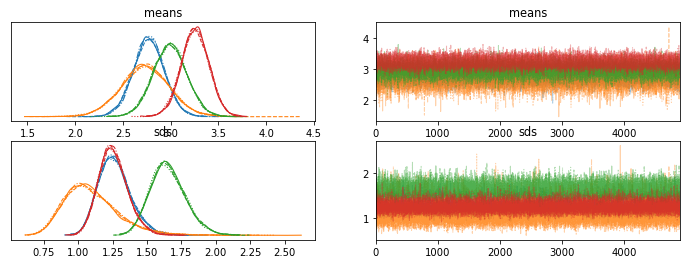

In [33]:
pm.traceplot(chain_cg)

In [34]:
tips_summayr =pm.summary(chain_cg)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/ma/.bin/anaconda3/envs/bays/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [35]:
tips_summayr

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],2.77,0.16,2.46,3.08,1.00e-03,1.00e-03,16997.0,13947.0,1.0
means[1],2.73,0.26,2.26,3.22,2.00e-03,1.00e-03,21246.0,14619.0,1.0
means[2],2.99,0.18,2.66,3.31,1.00e-03,1.00e-03,21881.0,16049.0,1.0
means[3],3.25,0.14,2.99,3.53,1.00e-03,1.00e-03,26842.0,14917.0,1.0
sds[0],1.27,0.12,1.05,1.49,1.00e-03,1.00e-03,21603.0,15133.0,1.0
sds[1],1.10,0.20,0.75,1.47,1.00e-03,1.00e-03,22170.0,14217.0,1.0
sds[2],1.65,0.13,1.41,1.89,1.00e-03,1.00e-03,23461.0,15458.0,1.0
sds[3],1.25,0.11,1.07,1.46,1.00e-03,1.00e-03,19962.0,14213.0,1.0
